Modification of the 1st version: Add construction period...investment ramped linearly over the construction period

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc
#enable latex editing
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [2]:
def NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price):
    prod=cf*1*365*24
    constructiont=int(round(construction_period))
    It=np.zeros(n+constructiont)
    #It[0]=It0
    Mt=np.ones(n+constructiont)*(OMkwh*prod+OMfixed)
    Et=np.ones(n+constructiont)*prod  #kwH
    if constructiont>0:  #if construction time zero, capex is the overnight cost         
        for x in range(constructiont):
            It[x]=It0/constructiont  #spread the investment evenly over the construction period
            Mt[x]=0   #No costs or production during construction
            Et[x]=0
    else:
        It[0]=It0    
    discounted_benefits=0.0
    discounted_costs=0.0
    for x in range(n+constructiont):
        t=x
        benefit=Et[x]*(wholesale_price/1000)/np.power((1+r),t)
        cost=(It[x]+Mt[x])/np.power((1+r),t)
        discounted_benefits=discounted_benefits+benefit
        discounted_costs=discounted_costs+cost
    return discounted_benefits-discounted_costs

In [3]:
#Assume that wholesale price simply fluctuates in time in the given range...i.e. permanently low wholesale price
def NPV2(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesalemin,wholesalemax):
    prod=cf*1*365*24
    constructiont=int(round(construction_period))
    It=np.zeros(n+constructiont)
    #It[0]=It0
    Mt=np.ones(n+constructiont)*(OMkwh*prod+OMfixed)
    Et=np.ones(n+constructiont)*prod  #kwH
    if constructiont>0.5:
        for x in range(constructiont):
            It[x]=It0/constructiont  #spread the investment evenly over the construction period
            Mt[x]=0   #No costs or production during construction
            Et[x]=0
    else:
        It[0]=It0
    discounted_benefits=0.0
    discounted_costs=0.0
    for x in range(n+constructiont):
        t=x
        wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)
        #wholesale_price=0.5*(wholesalemin+wholesalemax)
        benefit=Et[x]*(wholesale_price/1000)/np.power((1+r),t)
        cost=(It[x]+Mt[x])/np.power((1+r),t)
        discounted_benefits=discounted_benefits+benefit
        discounted_costs=discounted_costs+cost
    return discounted_benefits-discounted_costs
    

# Histogram of all sources together loop over something

In [5]:
#Nuclear parameters from DIW report
It0=4000  #Euros/kW
n=40      #years
nw=25
ns=25
now=25
cf=0.9
r=0.04    #Discount rate
OMkwh=0.012  #Euros/kWh variable O&M
OMfixed=90   #Euros/kW fixed O&M
OMkwhw=0.005  #Euros/kWh variable O&M
OMfixedw=30   #Euros/kW fixed O&M
OMkwhow=0.0  #Euros/kWh variable O&M
OMfixedow=100   #Euros/kW fixed O&M
OMkwhs=0.0  #Euros/kWh variable O&M
wholesale_price=80  #Euros/MWh
construction_period=6*0   #years...rounded to integer here...if zero, capex=overnight cost
construction_periodw=3*0
construction_periodow=4*0
construction_periods=2*0

In [6]:
#Testing that the function works reasonably
NPV_nuclear=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant

In [7]:
NPV_nuclear

5.18298570039047

In [8]:
CO2min=0
CO2max=0
loopsamples=3
#CO2taxv=np.linspace(CO2min,CO2max,CO2samples)
NPV_mean=np.zeros(loopsamples)
samples=100000
NPV_nuclearv=np.zeros(samples)
NPV_windv=np.zeros(samples)
NPV_owindv=np.zeros(samples)
NPV_solarv=np.zeros(samples)
rmin=0.04
rmax=0.1
Itminv=np.linspace(4000,3000,loopsamples)  #4000
Itmaxv=np.linspace(9000,5000,loopsamples)  #9000
wholesalemin=20
wholesalemax=80
Itminw=1500
Itmaxw=2000
Itminow=3100
Itmaxow=4700
cfminw=0.2
cfmaxw=0.37
cfminow=0.37
cfmaxow=0.51
Itmins=600
Itmaxs=1400
cfmins=0.09
cfmaxs=0.12
CO2tax=0
NPV_nuclearv=np.zeros((samples,loopsamples))

In [21]:
print(np.size(NPV_nuclearv))

300000


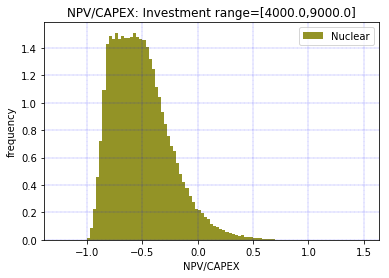

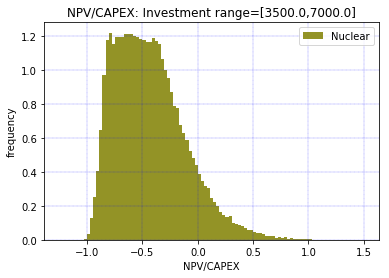

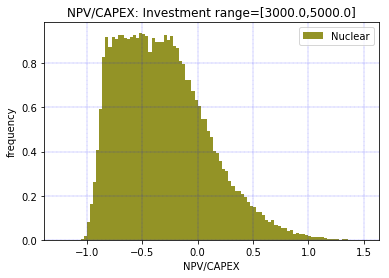

In [13]:
bins_fixed = np.linspace(-1.25, 1.5, 100)
for co in range(loopsamples):
    filename= "./Figs_Nukes/NPV_relative_to_capex_learning" + str(co)+ ".png"
    Itmin=Itminv[co]
    Itmax=Itmaxv[co]
    for x in range(samples):        
        It0=np.random.uniform(low=Itmin,high=Itmax)
        #It0w=np.random.uniform(low=Itminw,high=Itmaxw)
        #It0ow=np.random.uniform(low=Itminow,high=Itmaxow)
        #It0s=np.random.uniform(low=Itmins,high=Itmaxs)
        wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)+CO2tax
        r=np.random.uniform(low=rmin,high=rmax)
        #cfw=np.random.uniform(low=cfminw,high=cfmaxw)
        #fs=np.random.uniform(low=cfmins,high=cfmaxs)
        #fow=np.random.uniform(low=cfminow,high=cfmaxow)
        #OMfixeds=0.025*It0s   #2.5% of capex
        NPV_nuclearv[x,co]=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/It0        
        #NPV_windv[x]=NPV(construction_periodw,nw,r,cfw,It0w,OMkwhw,OMfixedw,wholesale_price)/It0w
        #NPV_solarv[x]=NPV(construction_periods,ns,r,cfs,It0s,OMkwhs,OMfixeds,wholesale_price)/It0s
        #NPV_owindv[x]=NPV(construction_periodow,now,r,cfow,It0ow,OMkwhow,OMfixedow,wholesale_price)/It0ow
    NPV_mean[co]=np.mean(NPV_nuclearv[:,co])
        #plt.hist([NPV_nuclearv], bins=75,alpha=0.5,density=True,color = ["olive"],label='Nuclear')
    #plt.hist([NPV_windv], bins=75,alpha=0.5,density=True,color = ["skyblue"],label='Onshore wind')
    #plt.hist([NPV_owindv], bins=75,alpha=0.5,density=True,color = ["dodgerblue"],label='Off-shore wind')
    #plt.hist([NPV_solarv], bins=75,alpha=0.5,density=True,color = ["lightsalmon"],label='PV')
    plt.hist([NPV_nuclearv[:,co]], bins_fixed,alpha=0.85,density=True,color = ["olive"],label='Nuclear')
    #plt.hist([NPV_windv], bins_fixed,alpha=0.5,density=True,color = ["skyblue"],label='Onshore wind')
    #plt.hist([NPV_owindv], bins_fixed,alpha=0.5,density=True,color = ["dodgerblue"],label='Off-shore wind')
    #plt.hist([NPV_solarv], bins_fixed,alpha=0.5,density=True,color = ["lightsalmon"],label='PV')
    plt.legend(loc='upper right')
    plt.title("NPV/CAPEX: Investment range=["+str(round(Itmin,2))+","+str(round(Itmax,2))+"]")
    plt.xlabel("NPV/CAPEX")
    plt.ylabel("frequency")
    plt.grid(color='b', linestyle='--', linewidth=0.25)
    plt.savefig(filename)
    plt.show()

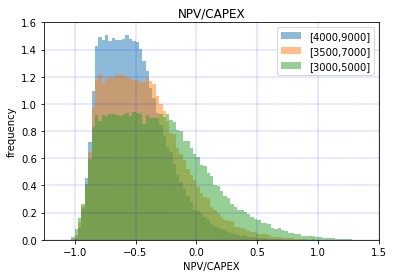

<Figure size 432x288 with 0 Axes>

In [15]:
bins_fixed = np.linspace(-1.25, 1.5, 100)
for co in range(loopsamples):
    labelh="["+str(int(Itminv[co]))+","+str(int(Itmaxv[co]))+"]"
    plt.hist([NPV_nuclearv[:,co]], bins_fixed,alpha=0.5,density=True,label=labelh)    
    xv=np.ones(2)*NPV_mean[co]
    yv=np.zeros(2)
    yv[1]=1.6
    #plt.plot(xv,yv,'r')
plt.legend(loc='upper right')
plt.title("NPV/CAPEX")
plt.xlabel("NPV/CAPEX")
plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
plt.xlim((-1.25,1.5))
plt.ylim((0,1.6))
plt.show()
filename= "./Figs_Nukes/NPV_relative_to_capex_learning.png"
plt.savefig(filename)

In [27]:
print(NPV_mean)

[-0.51056165 -0.43314211 -0.31501423]


In [29]:
NPV_mean[0]

-0.5105616518708183

In [33]:
loopsamples=3
#CO2taxv=np.linspace(CO2min,CO2max,CO2samples)
NPV_mean=np.zeros(loopsamples)
samples=100000
NPV_nuclearv=np.zeros(samples)
rminv=np.linspace(0.04,0.02,loopsamples) #0.04
rmaxv=np.linspace(0.1,0.05,loopsamples) #0.1
Itminv=np.linspace(4000,3000,loopsamples)  #4000
Itmaxv=np.linspace(9000,5000,loopsamples)  #9000
Itmin=4000
Itmax=9000
wholesalemin=20
wholesalemax=80
CO2tax=0
NPV_nuclearv=np.zeros((samples,loopsamples))

In [34]:
bins_fixed = np.linspace(-1.25, 2.0, 100)
for co in range(loopsamples):
    filename= "./Figs_Nukes/NPV_relative_to_capex_discount_and_learning" + str(co)+ ".png"
    rmin=rminv[co]
    rmax=rmaxv[co]
    Itmin=Itminv[co]
    Itmax=Itmaxv[co]
    for x in range(samples):        
        It0=np.random.uniform(low=Itmin,high=Itmax)
        wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)+CO2tax
        r=np.random.uniform(low=rmin,high=rmax)
        NPV_nuclearv[x,co]=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/It0        
    NPV_mean[co]=np.mean(NPV_nuclearv[:,co])

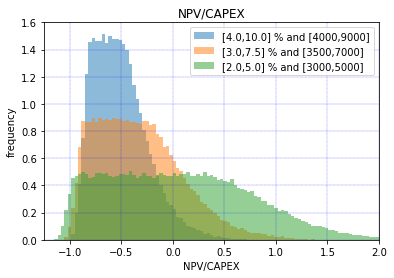

<Figure size 432x288 with 0 Axes>

In [35]:
for co in range(loopsamples):
    labelh="["+str(round(rminv[co]*100,1))+","+str(round(rmaxv[co]*100,1))+"] %"+" and ["+str(int(Itminv[co]))+","+str(int(Itmaxv[co]))+"]"
    plt.hist([NPV_nuclearv[:,co]], bins_fixed,alpha=0.5,density=True,label=labelh)    
    xv=np.ones(2)*NPV_mean[co]
    yv=np.zeros(2)
    yv[1]=1.6
    #plt.plot(xv,yv,'r')
plt.legend(loc='upper right')
plt.title("NPV/CAPEX")
plt.xlabel("NPV/CAPEX")
plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
plt.xlim((-1.25,2.0))
plt.ylim((0,1.6))
plt.show()
filename= "./Figs_Nukes/NPV_relative_to_capex_discount_and_learning.png"
plt.savefig(filename)

# Discount, learning, and co2 introduced

In [9]:
loopsamples=3
#CO2taxv=np.linspace(CO2min,CO2max,CO2samples)
NPV_mean=np.zeros(loopsamples)
samples=100000
NPV_nuclearv=np.zeros(samples)
rminv=np.linspace(0.04,0.02,loopsamples) #0.04
rmaxv=np.linspace(0.1,0.05,loopsamples) #0.1
Itminv=np.linspace(4000,3000,loopsamples)  #4000
Itmaxv=np.linspace(9000,5000,loopsamples)  #9000
CO2taxv=np.linspace(0,40,loopsamples)  
Itmin=4000
Itmax=9000
wholesalemin=20
wholesalemax=80
CO2tax=0
NPV_nuclearv=np.zeros((samples,loopsamples))

In [10]:
bins_fixed = np.linspace(-1.1, 1.0, 100)
for co in range(loopsamples):
    #filename= "./Nice_ones/Nuke_NPV2_discount_learning_CO2" + str(co)+ ".png"
    rmin=rminv[co]
    rmax=rmaxv[co]
    Itmin=Itminv[co]
    Itmax=Itmaxv[co]
    CO2tax=CO2taxv[co]
    for x in range(samples):        
        It0=np.random.uniform(low=Itmin,high=Itmax)
        wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)+CO2tax
        r=np.random.uniform(low=rmin,high=rmax)
        #NPV_nuclearv[x,co]=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/It0
        NPV_nuclearv[x,co]=NPV2(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesalemin,wholesalemax)/It0 
    NPV_mean[co]=np.mean(NPV_nuclearv[:,co])

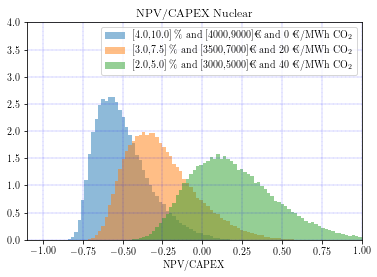

In [12]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for co in range(loopsamples):
    labelh="["+str(round(rminv[co]*100,1))+","+str(round(rmaxv[co]*100,1))+"] \%" + " and ["+str(int(Itminv[co]))+","+str(int(Itmaxv[co]))+"]€ and "+str(int(CO2taxv[co]))+" €/MWh CO$_2$"
    plt.hist([NPV_nuclearv[:,co]], bins_fixed,alpha=0.5,density=True,label=labelh)    
    xv=np.ones(2)*NPV_mean[co]
    yv=np.zeros(2)
    yv[1]=1.6
    #plt.plot(xv,yv,'r')
plt.legend(loc='upper right')
plt.title("NPV/CAPEX Nuclear")
plt.xlabel("NPV/CAPEX")
#plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
plt.xlim((-1.1,1.0))
plt.ylim((0,4.0))
plt.savefig(filename)
filename= "./Nice_ones/Nuke_NPV2_discount_learning_CO2.png"
plt.show()

# Same for photovoltaics

In [14]:
loopsamples=3
#CO2taxv=np.linspace(CO2min,CO2max,CO2samples)
NPV_mean=np.zeros(loopsamples)
samples=100000
NPV_solarv=np.zeros(samples)
OMkwhs=0.0  #Euros/kWh variable O&M
rminv=np.linspace(0.04,0.02,loopsamples) #0.04
rmaxv=np.linspace(0.1,0.05,loopsamples) #0.1
Itminv=np.linspace(600,500,loopsamples)  #4000
Itmaxv=np.linspace(1400,1000,loopsamples)  #9000
CO2taxv=np.linspace(0,40,loopsamples)  
Itmin=600
Itmax=1400
construction_periods=2*0
wholesalemin=20
wholesalemax=80
CO2tax=0
NPV_solarv=np.zeros((samples,loopsamples))
cfs=0.1
ns=25

In [15]:
bins_fixed = np.linspace(-1.5, 1.0, 100)
for co in range(loopsamples):
    #filename= "./Figs_Nukes/NPV_solar_relative_to_capex_discount_and_learning_and_CO2_b" + str(co)+ ".png"
    rmin=rminv[co]
    rmax=rmaxv[co]
    Itmin=Itminv[co]
    Itmax=Itmaxv[co]
    CO2tax=CO2taxv[co]
    for x in range(samples):        
        It0=np.random.uniform(low=Itmin,high=Itmax)
        OMfixeds=0.025*It0  #2.5% of capex"
        #wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)+CO2tax
        r=np.random.uniform(low=rmin,high=rmax)
        #NPV_nuclearv[x,co]=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/It0
        NPV_solarv[x,co]=NPV2(construction_periods,ns,r,cfs,It0,OMkwhs,\
                              OMfixeds,wholesalemin,wholesalemax)/It0 
    NPV_mean[co]=np.mean(NPV_solarv[:,co])

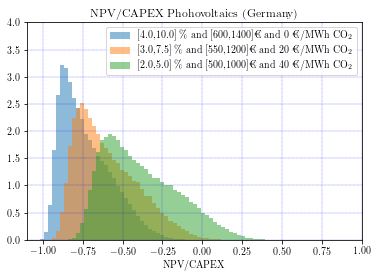

In [16]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for co in range(loopsamples):
    labelh="["+str(round(rminv[co]*100,1))+","+str(round(rmaxv[co]*100,1))+"] \%" + \
    " and ["+str(int(Itminv[co]))+","+str(int(Itmaxv[co]))+"]€ and "+str(int(CO2taxv[co]))+" €/MWh CO$_{2}$"
    plt.hist([NPV_solarv[:,co]], bins_fixed,alpha=0.5,density=True,label=labelh)    
    xv=np.ones(2)*NPV_mean[co]
    yv=np.zeros(2)
    yv[1]=1.6
    #plt.plot(xv,yv,'r')
plt.legend(loc='upper right')
plt.title("NPV/CAPEX Phohovoltaics (Germany)")
plt.xlabel("NPV/CAPEX")
#plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
plt.xlim((-1.1,1.0))
plt.ylim((0,4))
filename= "./Nice_ones/Solar_NPV2_discount_learning_CO2.png"
plt.savefig(filename)
plt.show()

# Same for onshore wind

In [17]:
loopsamples=3
#CO2taxv=np.linspace(CO2min,CO2max,CO2samples)
NPV_mean=np.zeros(loopsamples)
samples=100000
NPV_windv=np.zeros(samples)
OMkwhs=0.0  #Euros/kWh variable O&M
rminv=np.linspace(0.04,0.02,loopsamples) #0.04
rmaxv=np.linspace(0.1,0.05,loopsamples) #0.1
Itminv=np.linspace(1500,1000,loopsamples)  #4000
Itmaxv=np.linspace(2000,1500,loopsamples)  #9000
CO2taxv=np.linspace(0,40,loopsamples)  
Itmin=1500
Itmax=2000
construction_periodw=3
wholesalemin=20
wholesalemax=80
CO2tax=0
NPV_windv=np.zeros((samples,loopsamples))
cfminw=0.2
cfmaxw=0.37
nw=25
OMkwhw=0.005
OMfixedw=30

In [18]:
bins_fixed = np.linspace(-1.5, 1.0, 100)
for co in range(loopsamples):
    #filename= "./Figs_Nukes/NPV_solar_relative_to_capex_discount_and_learning_and_CO2_b" + str(co)+ ".png"
    rmin=rminv[co]
    rmax=rmaxv[co]
    Itmin=Itminv[co]
    Itmax=Itmaxv[co]
    CO2tax=CO2taxv[co]
    for x in range(samples):        
        It0=np.random.uniform(low=Itmin,high=Itmax)
        OMfixeds=0.025*It0  #2.5% of capex"
        #wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)+CO2tax
        r=np.random.uniform(low=rmin,high=rmax)
        cfw=np.random.uniform(low=cfminw,high=cfmaxw)
        #NPV_nuclearv[x,co]=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/It0
        NPV_windv[x,co]=NPV2(construction_periodw,nw,r,cfw,It0,OMkwhw,\
                              OMfixedw,wholesalemin,wholesalemax)/It0 
    NPV_mean[co]=np.mean(NPV_windv[:,co])

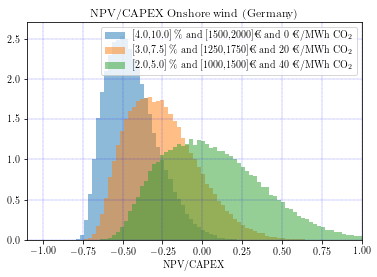

In [19]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for co in range(loopsamples):
    labelh="["+str(round(rminv[co]*100,1))+","+str(round(rmaxv[co]*100,1))+"] \%" + \
    " and ["+str(int(Itminv[co]))+","+str(int(Itmaxv[co]))+"]€ and "+str(int(CO2taxv[co]))+" €/MWh CO$_{2}$"
    plt.hist([NPV_windv[:,co]], bins_fixed,alpha=0.5,density=True,label=labelh)    
    xv=np.ones(2)*NPV_mean[co]
    yv=np.zeros(2)
    yv[1]=1.6
    #plt.plot(xv,yv,'r')
plt.legend(loc='upper right')
plt.title("NPV/CAPEX Onshore wind (Germany)")
plt.xlabel("NPV/CAPEX")
#plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
plt.xlim((-1.1,1.0))
plt.ylim((0,2.7))
filename= "./Nice_ones/Wind_NPV2_discount_learning_CO2.png"
plt.savefig(filename)
plt.show()